# The Measures of freedom - Hannah Costa

## Introduction


The Human Freedom Index is an annual survey that looks to categorise, quantify and rank the different 
economic, social and civil freedoms that a country provides its people. These quantities are tracked 
and published every year and the processed data made available to the public.

The motiviations behind this analysis revolve around probing the correlations between the Women's social
and security factor in the regions of the world where women's rights are most at risk. This strictly 
doesn't equate to 'business objective', but if we position ourselves where we seek value in the Human 
Freedom data then we must undersand the data and it's purpose in the same manner that would align to a 
business objective. 

Quantifying a variable like Freedom is an interesting task in itself to put a unit or a comparable scale on 
an intangible concept, but something, even as an observation has worth when it is analysed with our 
motivations in mind. Personally, I can see no point of a Human Freedom Index, other than a numerical exercise
if it is not used to point out where certain freedoms are lacking or declining. To understand this and provide
insight into the complex correlations around Women's Social Security is the starting point of this analysis.

## 1. Business Understanding
The following questions are addressed in the project:

    1. Do the different regions of the world have a distinct looking relationship between Women's rights and 
    their overall freedom status?

The assumption here is that the Women's Social and Security factor's relationship with the overall freedom 
score is culturally driven. Borders between countries have not always been static and in some regions are 
still volitile. Countries that border each other can have a shared cultural history and it is expected that 
the relationship plotted will form clusters. Some tighter than others, and it will be interesting to further
investigate the outliers in the regions. 

    2. For the Region where the Women's SS scores are typically high and the Region where they are typically
    low, is there a high or low variance between countries within the same region and are there cultural 
    similarities in the outliers where Women's SS in particularily low.

An outlier in a country that has equal women's rights will have a very different stroy to a country in a region 
still struggling for women's rights. But for the region with lowest women's rights are there other factors that 
add to thier cultural identify that might give some insights into teh descrency in women's freedom.

    3. Are there factors that are not in the Human Freedom Index that could better correlate to women's freedom?

This analysis was don't outside python as it uses a list of Muslim countries (>95% Muslim representation) that 
impliment Sharia Law and a sample of Muslim countries that do not. This is cited and given in the Blog post 
portion of the assignment and as the information needed was directly visable in the Human Freedom Index report
it was a trivial task to note the value into a table. The resulting graph also given in the medium Blog post.

https://hannahirons88.medium.com/the-measures-of-freedom-c564657ce860

The complimentary analysis outside of python demonstrated that there are area's missing or under represented in 
the Human Freedom Index as a handful of countries I wanted to look at (that had Sharia law in some variation) 
were not included in the data/report. On the global stage, freedom, or lack of it, is a controversial topic 
especially with regards to a sub set of people (women in this scenario). It is likely that the excluded countries 
would countain a freedom bias in the areas potentially most vunerable. This led me to form the final question of 
this analysis, which returns to python and this notebook.

    4. Where social freedom data is not available, could it be possible to find correlations in other factors
    strong enough to offer a prediction into whether Women's safety and security are at risk?
    
This is where it not just important to understand your data but where it can be trusted too. The point of this 
question is to build a model to predict a social freedom using only economic factors. The top correlatated factors
were pulled out to understand what the strongest factors in the model would be and if they made any sense in them 
being there. 
    


# Functions

The following cell contains the functions built for the data prep, analysis and visualisation of this project. 
The cell is to be run first so that all functions are available to be called in later sections of the code. 


In [10]:
import numpy as np
import matplotlib.pyplot as plt

def convert_float(dataframe):
  '''
  INPUT
    dataframe - any dataframe acceptable.
    col - local variable, used to go through all columns in the dataframe.
  OUTPUT
    dataframe - global varable. The input dataframe is replaced in the function. If the following 
    logic is applicable on a column level.  

  The function will cycle through each column in the dataframe and replace any dashes or spaces
  with the NaN value definition from the numpy library. If the column is numeric in nature but
  formatted as an object it will change it's datatype to a float. If the column is naturally a 
  string then the function will print "Could not convert", followed by the column name and move
  on to the next column.

  While debugging this function and viewing the dataset, at first look I believed all blanks in 
  the data were denoted by a '-', however one factor - that was a scored factor - was failing 
  (ef_regulation_labor_dismissal), and the currently commented out section identified the row in 
  that column that failed and that it was an empty space. 

  Therefore, if a column that you expect to able to turn into a float fails, then you can 
  uncomment the green section and rerun the function to get the row number that is failing, and 
  subsequently find out why it failed. I've kept it commented out because if the whole column
  fails for another reason then it will print every row of that column, so it's best used when
  a problem column has already been identified.   
  '''


  for col in dataframe:
    try:
      dataframe[col] = dataframe[col].replace(['-', ' '], np.NaN)
      dataframe[col] = dataframe[col].astype(float)
    except:
      # uncomment the following three lines to debug a failing column that should be able convert.
      # for row in dataframe[col]:
      #   if not isinstance(row, float):
      #     print(row)
      print('Could not convert ' + col)


def most_missing_col(dataframe, threshold):
  '''
  INPUT
    dataframe - the processed dataframe, with NaNs.
    threshold - the threshold for percenatge of missing values.
  OUTPUT
    missing_col_list - list of variables that have more missing values than the threshold identified.

  The function will create a list of variables from the dataframe that have a greater percentage of
  missing values than provided by the threshold input. 
  '''

  missing_col_list = list(dataframe.columns[dataframe.isnull().mean() > threshold])

  return missing_col_list


def country_per_region(selected_region, response, dataframe):
  '''
  INPUT
    selected_region - any region defined by the dataset
    response - which variable you want to take the mean of over the region
    dataframe - the dataset that contains Region
  OUTPUT
    out_data - the aggregated mean of the reponse variable over the selected region.

  This function works well to loop over multiple regions, or variables to get the mean
  of that variable for each region. It can be called inside a loop. But works fine
  on its own.

'''

  out_data = dataframe[dataframe["region"] == selected_region].groupby(["countries"]).mean()[response]

  return out_data


def plot_save_Region_correlation(var_1, var_2, region):
  '''
  INPUT
    var_1 - an input variable for plotting
    var_2 - an input varaible for plotting 
    region - for a selected region
  OUTPUT
    saved plot. no global returned variable.

  This function produces and saves a graph to compare two variables for a filtered region.

  '''
  save_name = "women's_freedom_correlated_with_freedom_score_for_" + region

  plt.figure(figsize = (10,8))
  plt.subplots_adjust(bottom = 0.2)

  plt.plot(var_1, linestyle = 'solid', color = 'r')
  plt.plot(var_2, linestyle = 'solid', color = '#4b0082')
  plt.ylabel("variable score")
  plt.xlabel("country")
  plt.xticks(rotation = 90)
  plt.legend(("Human Freedom Score", "Personal woman's score"), loc = 'lower right')
  plt.grid(True)

  plt.title("The average personal women's freedom score aggregated for the top correlated factors. \n Region = " + region)

  plt.savefig('./results/' + save_name + '.png')
  plt.close()


def correlations_top_bottom(dataframe, region_select, var, n):
  '''
  INPUT
    dataframe - the proccessed dataframe, must contain region.
    region_select - the selected region
    var - the response variable to check correlations against
    n - number of variables to print
  OUTPUT
    Print top - print the highest correlated factors
    Print bottom - print the highest anti-correlated factors

  This function prints out the highest correlated and anti-correlated factors compared with a given variable.
  The number of highest factors printed is given by n.

  '''

  correlations = dataframe[dataframe["region"] == region_select].corr()
  sorted_corr = correlations[var].sort_values()

  Top = sorted_corr[-n:]
  print(Top)
  Bottom = sorted_corr[:n]
  print(Bottom)


def variable_per_region(selected_region, var, response, dataframe):
  '''
  INPUT
    selected_region - region of interest
    var - correlated variable of interest
    response - the orginal variable it was checked for correlations against. 
  OUTPUT
    out_data - the relationship between the correlated pair for a selected region.

  This function gives the mean value of the correlated factor to the response factor for a
  given region so that they can be plotted before potential modelling.

'''

  out_data = dataframe[dataframe["region"] == selected_region].groupby([var]).mean()[response]

  return out_data



# The Run sections of the code. The project and analysis is structured in the cells that follow.

## 2. Data Understanding

The Human Index data combines measures of economic and personal freedom to assign a total 
Human Freedom score to a country and rank it based on this score. The survey has been 
conducted since 2008 for the earliest definition, and the most recent data availiable is 
from 2019, which is used in this assignment. 

The data available isn't the raw data from the Freedom project, and is made up of the economic 
and personal freedom factors that are all on a scored scale between 0-10. The Human Freedom 
report offers some insight in the meanings behind these factors but their definitions, 
or what the score directly translates to numerically is unknown.

For example the pf_ss_women_fgm factor relates to Female Genital Mutilations in a country, but 
the score doesn't tell me if it's based on number of cases reported per population percentage.
'pf' in a factor means that it's used to create a Personal Freedom Factor and 'ss' means it's 
in the 'Security and Safety' category. 

The freedom indicators covered by the report are:

Rule of Law
Security and Safety
Movement
Religion
Association, Assembly, and Civil Society
Expression and Information
Identity and Relationships
Size of Government
Legal System and Property Rights
Access to Sound Money
Freedom to Trade Internationally
Regulation of Credit, Labor, and Business


In [11]:
# Prepare Data
## 1. Import Libraries
## 2. Locate and read in data csv
## 3. Check import by viewing data head

'''
RUN file for Udacity Data science nanodegree: Project One - Write a Data Science Blog Post
Author: Hannah Costa

The data chosen for this assigmnet was the Human Freedom Index data avaialble on Kaggle.
LINK: https://www.kaggle.com/gsutters/the-human-freedom-index


This Run file will call functions and scripts with the purpose of reading in the data and 
processing it so it can be used to explore correlations and insights in the data while
focusing on the implications of women's freedom. The author is using python 3.8.5 in Jupyter notebook.

'''
# Call the libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sns


## Gather data

In [12]:
# Read dataset into a dataframe
df = pd.read_csv('./data/datasets_93172_883723_hfi_cc_2019.csv')
# Check the first handful of rows to ensure the data was retrieved. note: 120 columns expected
print(df.head())

   year ISO_code  countries                         region hf_score hf_rank  \
0  2017      ALB    Albania                 Eastern Europe     7.84      38   
1  2017      DZA    Algeria     Middle East & North Africa     4.99     155   
2  2017      AGO     Angola             Sub-Saharan Africa      5.4     151   
3  2017      ARG  Argentina  Latin America & the Caribbean     6.86      77   
4  2017      ARM    Armenia        Caucasus & Central Asia     7.42      54   

  hf_quartile pf_rol_procedural pf_rol_civil pf_rol_criminal  ...  \
0           1               6.7          4.5             4.7  ...   
1           4                 -            -               -  ...   
2           4                 -            -               -  ...   
3           2               7.1          5.8             4.3  ...   
4           2                 -            -               -  ...   

  ef_regulation_business_adm ef_regulation_business_bureaucracy  \
0                        6.3               

## Assess data
Drop the collated factors, their contributors are already in the data. 

In [13]:
# Because of the processed nature of the data set I want to drop some of the factors that
# are generated by the more base factors.
df = df.drop(["ISO_code", "ef_score","pf_score", "pf_rank", "ef_rank", "hf_rank", "hf_quartile"], axis = 1)
# print(df.dtypes)

## Clean data / process data

The whole dataset comes in as "objects" despite the majority of the data being a numerical score. 
There is a function created to go through each column and convert it into a float where possible and output a message where is can't because the column is a string. 

In [14]:

# The next step would be to convert the columns that can be converted to floats in order to be able
# to perform numerical analysis on the dataset. 

convert_float(df)

Could not convert countries
Could not convert region


The print out should read "Could not convert countries" and "Could not convert region", which is expected
as they are strings and can remain as an object in formatting.

Dealing with missing data and dropping columns. The dropped columns are listed in the outpiut so we are aware 
of which factors are being removed.

In [15]:
# create a list of columns that have more than 25% of their values missing.
col_list = most_missing_col(df, 0.25)

# Check column list to be aware of what's being dropped
print(col_list)

# Drop the columns that have the most missing values
df = df.drop(col_list, axis=1)

['pf_rol_procedural', 'pf_rol_civil', 'pf_rol_criminal', 'pf_ss_women_inheritance_widows', 'pf_ss_women_inheritance_daughters', 'pf_religion_estop_establish', 'pf_religion_estop_operate', 'pf_association_political_establish', 'pf_association_political_operate', 'pf_association_prof_establish', 'pf_association_prof_operate', 'pf_association_sport_establish', 'pf_association_sport_operate', 'pf_identity_legal']


## 3. Analysis and Evaluation of results

The following section addresses questions one and two. Region is seperated out as a list and looped 
over to extract the appropriate data for Women's Social and Security score and the overall Human
Freedom score. These are then plotted together (for each region) and the figures are save in the
results location: /results/, just a directory down from the notebook location.

The plots paint an interesting picture between the regions, highlighting the difference between first 
world, developing and third world regions. For economically richer regions, both Women's social and 
security factor and the overall Human Freedom score are high, with the women's factor being mostly 
above 9 and the overall freedom score a couple of points lower. The variance between country is low 
and the gap between womens and overall freedom score is pretty constant. For economically poorer regions
both scores are low but in comparison to Western Europe the women's score has taken a larger hit. It's
also much more volatile, with outliers having a relatively high women's score and a number of outliers 
having the lowest overall women's score in the world.

Further analysis into lower women's freedom score will use the region described by Sub-Saharan Africa
as it's a large region with some unique trends.



## Analyze and Visualize

In [16]:
Region_list = list(set(df["region"]))

# Check that region_list has populated correctly
# print(Region_list)

# Loop over region_list for average scores for hf_score and pf_ss_women score. Plot togther for 
# each country per region. Save the figures so they do not overwrite each other. 

for region in Region_list:
  region_pf_women = country_per_region(region, "pf_ss_women", df)
  region_hf_score = country_per_region(region, "hf_score", df)
  plot_save_Region_correlation(region_hf_score, region_pf_women, region)

# 4. Data Modelling

## viable correlations

Having probed in some interesting areas of the data we've started understand what kind of model
we want to build. The following section addresses question four in our motivations. 

The purpose of the model is to see whether you could predict the Women's social and security 
score (or any personal freedom factor) from factors that it doesn't consist of, and even if you can
use only the econmic freedom factors to create a prediction.

This would give some insight into how strongly linked a countries economic freedom (linked to 
econmic wealth) is to it's women's rights, i.e is the a gendered skew in non-gendered factors. 
Secondary to this is that where data is not available, and it seems that the more controversial
personal freedoms had the nighest percentage of missing values, can we predict is women's rights
are suffering in areas where the data is hard to ascertian.

However in digging into the data on a country level (see blog post), the countries that are excluded
from the data have a high potential for a freedom bias that if available could impact any model. 

We can start by printing out the highest positive and negative correlations for pf_ss_women for
Sub-Saharan Africa.


In [17]:
print(correlations_top_bottom(df, "Sub-Saharan Africa", "pf_ss_women", 10))

ef_legal                         0.271014
ef_legal_protection              0.303193
ef_regulation_business_bribes    0.305410
ef_legal_military                0.309798
ef_legal_judicial                0.360162
hf_score                         0.380304
pf_ss                            0.637599
pf_ss_women_inheritance          0.759284
pf_ss_women_fgm                  0.802604
pf_ss_women                      1.000000
Name: pf_ss_women, dtype: float64
ef_government_transfers       -0.349969
ef_trade_tariffs_sd           -0.246652
ef_government_consumption     -0.231973
ef_regulation_labor_firing    -0.200293
ef_legal_integrity            -0.194131
ef_regulation_labor_bargain   -0.151508
pf_association_assembly       -0.114447
pf_association_political      -0.099305
ef_legal_enforcement          -0.090885
ef_government_soa             -0.074465
Name: pf_ss_women, dtype: float64
None


## Visualise correlations

pf_ss_women_'inheritance/fgm'are used to create pf_ss_women so of course the correlations are high 
and we can't use them in teh model because we're acting in teh assumption that these values would be
missing. 

Next we take a look of the correlation for the highest correlated economic freedom factors for Sub-
Saharan Africa, and use a plot to visualise it.


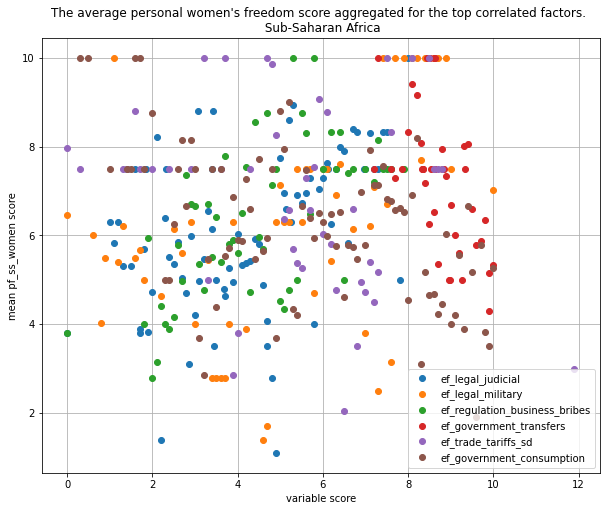

In [18]:
# Closer look at the correlation for Sub Saharan Africa
var_list = ["ef_legal_judicial", "ef_legal_military", "ef_regulation_business_bribes", "ef_government_transfers", "ef_trade_tariffs_sd", "ef_government_consumption"]

plt.figure(figsize = (10,8))
plt.xlabel("variable score")
plt.ylabel("mean pf_ss_women score")
plt.title("The average personal women's freedom score aggregated for the top correlated factors. \n Sub-Saharan Africa")
plt.grid(True)

d = {}
for var in var_list:
  d[var] = variable_per_region("Sub-Saharan Africa", var, "pf_ss_women", df)
  plt.plot(d[var], 'o')

plt.legend((var_list), loc ='lower right')
plt.savefig('./results/scatter_correlations_SSA.png')

# plt.close()

## Further data cleaning and data modelling
 The last step is to build a simple linear regression model and split in between training and test data.

In [19]:
#  Can you model womens's freedomn using only economic factors per region.
df_modelling = df.dropna(subset = ["pf_ss_women"], axis = 0)

X = df_modelling.filter(regex = '^ef', axis = 1)
y = df_modelling["pf_ss_women"]

fill_mean = lambda col: col.fillna(col.mean())

# I've kept the following function inside the run_file instead of the function_file to toggle the different print functions on and off when debugging.
for col in X:
  if X[col].isnull().sum() == 0:
    # print(col + " no NaN's")
    continue
  else:
    try:
      X = X.apply(fill_mean, axis = 0)
      print(col + " worked as expected")
    except:
      print(col + " did not replace NaN with mean")


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state = 15)
lm_model = LinearRegression(normalize = True)
lm_model.fit(X_train, y_train)

Score = str(lm_model.score(X_test, y_test, sample_weight = None))

print("The Model performed with a Score of " + Score)

ef_government_transfers worked as expected
The Model performed with a Score of 0.5401751775708902


## Conclusions

After visualising the top correlations it's not very suprising that the model performs poorly 
even when it's allowed to use all the economic freedom factors. It scored 0.54 [2dp] on the 20%
left over test dataset.

There is some correlation and trend between the different categories of freedom quantified by
the HFI, but they are seperate because they represent very different types of freedom that
someone can experience and the total Freedom score needs data on both personal and economic freedoms.

But when we're looking for vunerability in the freedoms of a subset of people within a country it 
does still seem linked to it's outward preception of economic wealth and strength. There are exceptions
to this where a country still values it's women's rights and it scores significantly higher than it's 
overall freedom score (Cape Verde, Seychelles) and others with a relatively string freedom score that
still manages to hide a low women's score with it (Brunei). 

Please refer to the Medium blog post that supports this proect for a full dicsussion of the results
https://hannahirons88.medium.com/the-measures-of-freedom-c564657ce860

Github repo
https://github.com/Hannah-Irons/womens-freedom
